# Introduction

<p align="justify">Welcome! In this case we'll be exploring how to use advanced analytic and machine learning techniques to predict high risk asthmatic patients. Don't worry if you're unsure what some of these terms are. They'll be explained throughout the case. Let's begin! 
<br>
<br>
<details>
<summary>Some of the skills you'll explore are (Click to Expand):</summary>
<ul>
    <li>R Programming</li>
    <li>Data Cleaning</li>
    <li>Descriptive Analysis</li>
    <li>Data Visualization</li>
    <li>Leveraging Domain Knowledge</li>
    <li>Logistic Regression</li>
    <li>Machine Learning</li>
</details><br>

<img src="https://i.stack.imgur.com/zlAi2.png" style="float: left; width: 35%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="http://cran.uvigo.es/Rlogo.svg" style="float: left; width: 25%; margin-left: 2%; margin-bottom: 0.5em;">
<img src="https://www.edvancer.in/wp-content/uploads/2015/10/f5bd5f87059fce20564f6e5eb562022e.png" style="float: left; width: 27%; margin-left: 5%; margin-bottom: 0.5em;">

## Case Scenario

Imagine you're a risk manager at the Blue Cross Blue Shield (a large health insurance organization). Over the last winter, reports show that the number of asthma cases increased. You're dismayed to discover that this has lead to an increase in deaths and costs among these patients as well. It's critical that a targeted intervention is developed to lower mortality and cost among these patients but first you must identify high-risk patients. How can you do this?

Continue through the case to find out. 

### Clinical Background: Asthma

Asthma is a respiratory disease which causes constriction and inflammation of the airways in the lungs. The disease can often cause acute airway constrictions sometimes known as “asthma attacks.” Clinicians refer to this airway restriction as “bronchospasm” and it results in cough, wheezing, shortness of breath, and extreme situations such as death from respiratory arrest. Currently, approximately 10 people die from asthma attacks per day in the US.

<p align="center">
  <img width="400" height="200" src="https://asthma.net/wp-content/uploads/2015/04/ASTHMATIC-AIRWAYS.jpg">
</p>


Asthma requires a test of lung function known as spirometry to make a definitive diagnosis. Treatment often consists of inhaled medications that helps combat airway constriction and inflammation. Patients that do not get timely and appropriate treatment can need avoidable emergency care and hospitalizations. These visits can add thousands of dollars per year in avoidable medical expenses to the US healthcare system. The medical costs among patients with uncontrolled asthma are 3-times higher than controlled patients.

## Using Jupyter Notebook 

To run any of the code, select the code cell on the **bottom right (1.2)**, and click the `Run` button on the toolbar above. Try it out on the example code cell below on the **bottom right (1.2)**.

**The** `Run` **Button**
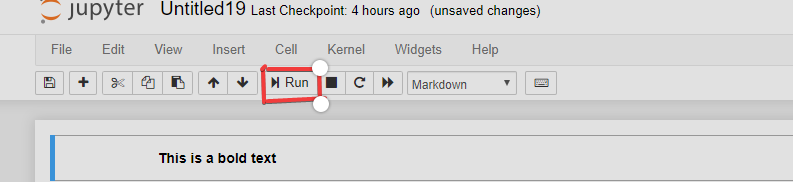

In [38]:
# This is an example of a code cell
cat('Congratulations! \n')
cat('You\'ve run your first code cell.\n')


Congratulations! 
You've run your first code cell.


### Jupyter Notebook Background

What is a Jupyter Notebook? Why is it so special? Below is a definition of Jupyter Notebook from the creators. 

> "The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more." - [jupyter.org](https://www.jupyter.org)

Through integrating code, text, and multimedia, jupyter notebooks allow us to create a digital notebook that is both **interactive** and **informative**. Don't just take my word for it though, personally explore how Jupyter Notebook can augment your learning through the case!
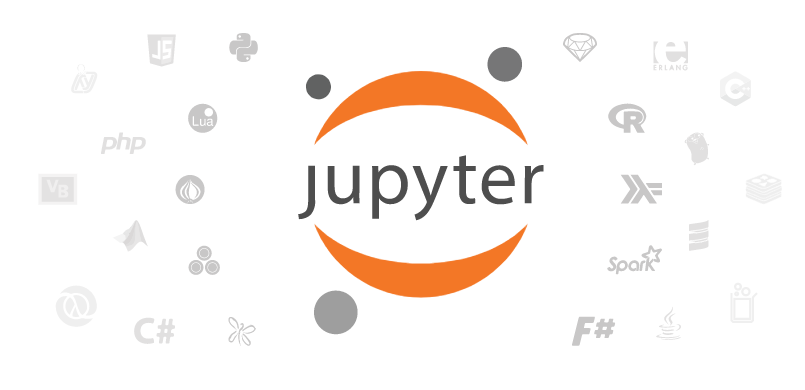


### Case Code Tips

Within code cells you will see green text preceded by a `#` symbol. These are comments and will help explain what portions of the code are doing. All code should be ready to run as shown. 

Some code may require more time to run. On the left hand side you will notice the label: `In [ ]:`. If there is an `*` in between the `[]`'s after you select `Run`, that indicates that your code is in the process of running. Like so: `In [*]:`

## Meeting Our Data

We'll be using the Medical Expenditure Panel Survey (MEPS) to predict Asthma Expenditure. Identifying an appropriate data source is critical in Analytics. Without the right dataset, your analysis is doomed from the start. 

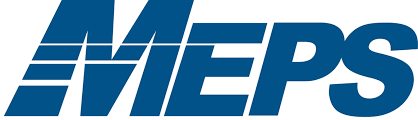

### What is MEPS?

MEPS is a national survey that seeks to capture as much data as possible about healthcare costs and use within the United States. Below is a detailed definition. 

> The Medical Expenditure Panel Survey (MEPS) is a set of large-scale surveys of families and individuals, their medical providers, and employers across the United States. MEPS is the most complete source of data on the cost and use of health care and health insurance coverage. - [meps.ahrq.gov](https://meps.ahrq.gov/mepsweb/)

MEPS contains over 2000 variables, detailed expenditure data, and comprehensive  medical information. In other words, it has all the ingredient to build our prediction model!


### Necessary Data Files

<p style="text-align: center;">h128.csv</p>

***
Contains data on medical conditions for 2009 MEPS sample

<p style="text-align: center;">h129.csv</p>

***
Contains main information for 2009 MEPS sample, information includes survey data, demographics, and expenditure data

Both data files will already be downloaded as part of our case. They can also be accessed directly from the MEPS website. 'h128' can be accessed [here](https://meps.ahrq.gov/mepsweb/data_stats/download_data_files_detail.jsp?cboPufNumber=HC-128). 'h129' can be accessed [here](https://meps.ahrq.gov/mepsweb/data_stats/download_data_files_detail.jsp?cboPufNumber=HC-129)

# Setup (Do Not Skip)

Run the code below to set up specific settings for our case. Do not skip this step!

In [31]:
# Increase max number of columns displayed in output tables
options(repr.matrix.max.cols = 2000)
cat('Setup complete!')
# Calling external libraries for additional functionality
library(dplyr)
library(caret)
set.seed(10) # Seeding so we obtain the same outcome when we randomly sample

Setup complete!

# Cleaning Our Data

The first step in any analytic project is to clean our data. This is a critical step that commonly overlooked within data science projects. However, without properly processed data, it won't matter how sophisticated our analysis is. A common saying in data science is "Junk in, Junk out". 

## Reading Our data

We'll being by reading in our data so we can clean and use it. 

In [ ]:
# Note: Unicode Transformation Format – 8 (UTF-8) is a standard to encode characters in different languages
cat('Data loading, please wait\n')
condition <- read.csv(file="data/h128.csv",  encoding="UTF-8", header=TRUE, sep=",")
consolidation <- read.csv(file="data/h129.csv",  encoding="UTF-8", header=TRUE, sep=",")
cat('Data loaded!')

## Selecting Asthmatic Patients

The MEPS data contains individuals with numerous condition. We need to select only those individuals with asthma. We will identify these patents based on their International Classification of Disease, Ninth Revision (ICD-9) code. A ICD-9 code is simply a code that represents a diagnoses.

First, lets see how many total observations there are to establish a baseline.

In [ ]:
# Display the total number of data instances
cat("The number of entire data instances are:", length(condition$DUID),"\n")

It looks like there are 117342 total observations. Now lets select only asthmatic patients from those observations. We will identify these patients based on their international Classification of Disease, Ninth Revision (ICD-9) code. A ICD-9 code is simply a code that represents a diagnoses.

In [ ]:
# Select data instances related to asthma (493)
condition <- subset(condition, ICD9CODX == 493)
cat('Data selected')

Now let's remove duplicate check how many observations are now in the dataset

In [ ]:
# Removing duplicates
condition = condition[order(condition[,'DUPERSID'],-condition[,'CONDIDX']),]
condition = condition[!duplicated(condition$DUPERSID),]

# Show the number of selected data instances
cat("The number of selected data instances are:", length(condition$DUID),"\n")

We've gone from 117342 to 2375 observations!

### More About ICD Codes

ICD was created promote international comparability in the collection, processing, classification, and presentation of mortality statistics. Each code is suppose to uniquely describe a particular diagnosis in detail. For instance, asthma has an ICD-9 code of 493.The latest iteration of ICD is actually ICD-11. ICD codes are used for a wide variety of task including processing health insurance claims, tracking disease epidemics, and compiling worldwide mortality statistics. ICD codes are used everywhere within the United States ranging from the smallest clinics to large government health agencies. They are essential to healthcare in the United States and many places worldwide. Below are some example ICD codes. 

<img src="https://www.miramedgs.com/images/TheCodeMay2015Chart3.2.png">

## Merging the Data

Next, we need to combine our data. Remember, our data was originally two files (`h128` and `h129`). `h128` contains medical information about each patient. It's the data we used to select for asthmatic patients. `h129` contains the main information we are interested in including survey data, demographics, and expenditure. We will combine both our data tables into one single table. This will make is much simpler to analyze the data.  

In [ ]:
# Merging the data
aggregation <- merge(x = consolidation, y = condition[, c("DUPERSID", setdiff(colnames(condition),colnames(consolidation)))], 
                     by.x = "DUPERSID", by.y = "DUPERSID" )
cat('Data merged!')

Lets confirm our data was successfully merged

In [ ]:
# Display the first few rows of the data
cat('Displaying first few rows of merged data:\n')
head(aggregation)

### What Just Happened?

We just combined our two data tables in a process known as a merge. In a merge, the datasets you seek to merge should have one or more common variables between them. The data is then joined by this variable with accompanying values for variables specified with information specified by all datasets in one table. 
<img src="http://www.datasciencemadesimple.com/wp-content/uploads/2017/04/column-binding.png" align="center" style="width: 50%; margin-bottom: 0.5em; margin-top: 0.5em;">
The data was joined based on a field named `DUPERSID`. This variable is simply an ID for each of the observations.

## Removing Extraneous Variables

Now we will drop the variables that are not relevant to our analysis. Normally, variable selection is a careful process informed by clinical/domain knowledge. For the purpose of this case, variable selection has been done for you. We will explore variable selection in more detail in Section 4: Identifying Relevant Variables. 

Lets examine the number of variables before variable selection. 

In [ ]:
# Drop variables that are not important for our analysis.
cat("The number of variables before selecting are:", length(aggregation),"\n")
cat("Displaying the the first few rows of the data:\n")
head(aggregation)

Our data contains 1937 variables! Lets see how many remain after variable selection. 

In [ ]:
# The following variables are the names of variables that are relevant.
asthma_variables <- c("ASACUT53", "ASMRCN53", "ASPKFL53", "ASPREV53", "ASTHAGED", "ASTHDX", "ASTHEP53",
                      "ASWNFL53", "ADSMOK42", "ASPRIN53", "CHBRON53", "EMPHAGED", "EMPHDX" )

general_variables <- c("ADAPPT42", "ADEGMC42", "ADEXPL42", "ADHECR42", "ADNSMK42", "ADPRTM42", "AGE09X", "BLIND42",
                       "BMINDX53", "CHAPPT42", "CHBMIX42",  "CHECK53", "DSFL0853", "DSFL0953", "DSFLNV53", "EXRCIS53", 
                       "PHYSCL42", "FAMINC09", "INS09X", "INSCOV09", "UNINS09", "OCCCAT53", "PERWT09F", "PMDLAY42", 
                       "PMUNAB42", "PMUNPR42","PMUNRS42", "POVLEV09", "RACETHNX", "REGION09", "RTHLTH53", "SEX", 
                       "SPOUIN09", "TOTEXP09", "TTLP09X", "UNABLE53", "WKINBD53", "WLKDIF53", "WLKLIM53" )

essential_variables <- c("DUPERSID","CONDIDX")

all_variables <-c(asthma_variables, general_variables, essential_variables)

## Select variables
aggregation <- aggregation[, c(which(names(aggregation) %in% all_variables))]

cat("The number of variables after selecting are:", length(aggregation))

# Display first few rows
cat("\nDisplaying the the first few rows of the data:\n")
head(aggregation)


We now have only 54 variables! This is a much more manageable amount. 

## Creating Our New Dataset

Finally, we need to create a file of newly cleaned data

In [ ]:
# Create a new file with the cleaned data
write.csv(aggregation, file = "data/aggregation.csv",row.names=FALSE)
cat('File Created!')

With our cleaned dataset, we can now explore our data more deeply. In the next section, we will be investigating how we can identify clinically relevant variables for building our prediction model using descriptive analysis and data visualization. 

# Identifying Relevant Variables

To build a robust prediction model, we need to identify clinically relevant variables (also known as 'features'). In this section, we'll be identifying important features through a combination of clinical knowledge, descriptive analysis, and data visualization. We'll be demonstrating these concepts through exploring how aspirin usage impacts health expenditure among asthma patients. 

### Why Can't We Just Use More Variables?

One issue you might be wondering about is why do we even need to select variables. Why not just use all of the variables? After all, more data lead to better models right? This is a common misconception that even experience analysts need to watch out for. Including too many features in your prediction model can lead to what is known as 'overfitting'. Overfitting is essentially where you build a model that adheres too closely to your current data set and is unable to predict observations that are not from your current data set. In other words, its where you develop a model that tuned too closely to your current data, and is not generalizable to outside data sources. 

<img src="https://3gp10c1vpy442j63me73gy3s-wpengine.netdna-ssl.com/wp-content/uploads/2018/03/Screen-Shot-2018-03-22-at-11.22.15-AM-e1527613915658.png" align="center" style="width: 50%; margin-bottom: 0.5em; margin-top: 0.5em;">

## Reading Our New Data

To begin, we'll need to read our new data file created during the data cleaning process titled 'aggregation.csv'. 

In [32]:
# Reading our data file
cat('Data loading, please wait\n')
aggregation <- read.csv(file="data/aggregation.csv",  encoding="UTF-8", header=TRUE, sep=",")
cat('Data loaded!')

Data loading, please wait
Data loaded!

Lets confirm our loaded data is correct. It's good practice to check your data throughout an analysis. 

In [ ]:
# Display the first few rows of the data
cat("Displaying the the first few rows of the data:\n")
head(aggregation)

## Why Aspirin?

Why are we even looking at aspirin in the first place? This is because of Aspirin Exacerbated Respiratory Disease (AERD), which is a disease associated with asthma patients who take aspirin. Since this condition is more common among aspirin-taking asthma patients compared to non-aspirin-taking asthma patients, we expect costs to be higher among patients who take aspirin. The variable which details aspirin usage is `ASPRIN53`.

> Note: This is an example of why clinical or domain knowledge is so important. Having this information about aspirin allowed us to hone in on this variable from nearly 2000 total. Can you imagine how inefficient it would be if you had to search through every variable individually?

Lets begin by examining the distribution for the aspirin variable. 

In [ ]:
# See the distribution of aspirin usage
table(aggregation$ASPRIN53)

We can see the current data labels are not very informative. Figuring out how variables are specified or 'coded' is commonly solved through consulting documentation and accompanies datasets. 

 From the [MEPS website](https://meps.ahrq.gov/mepsweb/data_stats/download_data_files_codebook.jsp?PUFId=H129&varName=ASPRIN53) we can see what each of the labels represent. Most useful for our purpose are the labels listed below:
- 1 = Yes (to taking aspirin every other day)
- 2 = No (to taking aspirin every other day)

Lets take this information and code the data in a more meaningful way. 

In [ ]:
# Creating a subset of the data of those who take aspirin
taking_aspirin <- subset(aggregation, ASPRIN53 == 1)

# Creating a subset of the data of those who do not take aspirin
not_taking_aspirin <- subset(aggregation, ASPRIN53 == 2)
cat('Data recoded')

We will now randomly sample 100 individuals from each of our subsetted data. This will allow us to make an equitable comparison between the two groups when we compare their distributions. 

In [ ]:
# Sampling 100 individuals from the taking aspirin group
sample_taking_aspirin <- sample_n(taking_aspirin, 100)
cat('Number of observatins in taking aspirin group', length(sample_taking_aspirin$ASPRIN53)) 

# Sampling 100 individuals from the not taking aspirin group
sample_not_taking_aspirin <- sample_n(not_taking_aspirin, 100)
cat('\nNumber of observatins in not taking aspirin group', length(sample_not_taking_aspirin$ASPRIN53)) 


The two cells below will return the annual healthcare expenditure for each randomly sampled individual for both of our subsets. 

In [ ]:
sample_taking_aspirin$TOTEXP09

In [ ]:
sample_not_taking_aspirin$TOTEXP09

Not very easy to compare or see patterns is it? This is where we will employ descriptive analysis and data visualization to make make sense of this information. 

### Additional Information About AERD

Aspirin Exacerbated Respiratory Disease (AERD) is a medical condition consisting of three
key features: asthma, chronic/recurrent rhinosinusitis (inflammations of sinuses and nasal cavity), and
nasal polyps. The symptoms are a result of an abnormal reaction from the bodies immune system,
known as a hypersensitivity reaction, to aspirin. The disorder is thought to be caused by an anomaly in the metabolism of a substance known as arachidonic acid. Medications, such as aspirin, block the COX-1 enzyme, a critical enzyme involved in arachidonic acid metabolism. This leads to increased production of proinflammatory cysteinyl leukotrienes, a series
of chemicals involved in the body's inflammatory response. This resulting overproduction cause severe
exacerbations of asthma and allergy-like symptoms.

<img src="https://naveenbhandarkarmd.com/wp-content/uploads/2018/08/Aspirin-Exacerbated-Respiratory-Disease-Dr.-Naveen-Bhandarkar-1.jpg" align="center" style="width: 30%; margin-bottom: 0.5em; margin-top: 0.5em;">

## Aspirin Expenditure Summary Statistics

Lets take a look at some summary statistics of the aspirin-taking group. 

> Note: the below figures express annual expenditure in dollars per person

In [ ]:
cat("Mean:", mean(sample_taking_aspirin$TOTEXP09))
cat(" SD", sd(sample_taking_aspirin$TOTEXP09), "\n") 
cat("Median", median(sample_taking_aspirin$TOTEXP09))
cat(" IQR:", IQR(sample_taking_aspirin$TOTEXP09), "\n") 

Lets take a look at some summary statistics of the non-aspirin-taking group. 

In [ ]:
cat("Mean:", mean(sample_not_taking_aspirin$TOTEXP09))
cat(" SD", sd(sample_not_taking_aspirin$TOTEXP09), "\n") 
cat("Median", median(sample_not_taking_aspirin$TOTEXP09))
cat(" IQR:", IQR(sample_not_taking_aspirin$TOTEXP09), "\n") 

Already, we can see that the mean and median annual expenditure is higher in the aspirin-taking group. We can also visually capture the difference using data visualization. 

**Food For Thought:** When should you use median compared to mean?

When your data falls in a normal distribution, it is better to use the mean. However, if your data includes extreme values or is skewed, it is better to use the median. 

<img src="https://keydifferences.com/wp-content/uploads/2016/04/mean-vs-median.jpg" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

## Visualizing Aspirin Costs With A Histogram

We can compare the shapes of the distributions for each group using a histogram. Below is the histogram for the aspirin-taking sample. 

Warning message in rug(jitter(sample_taking_aspirin$TOTEXP09)):
“some values will be clipped”

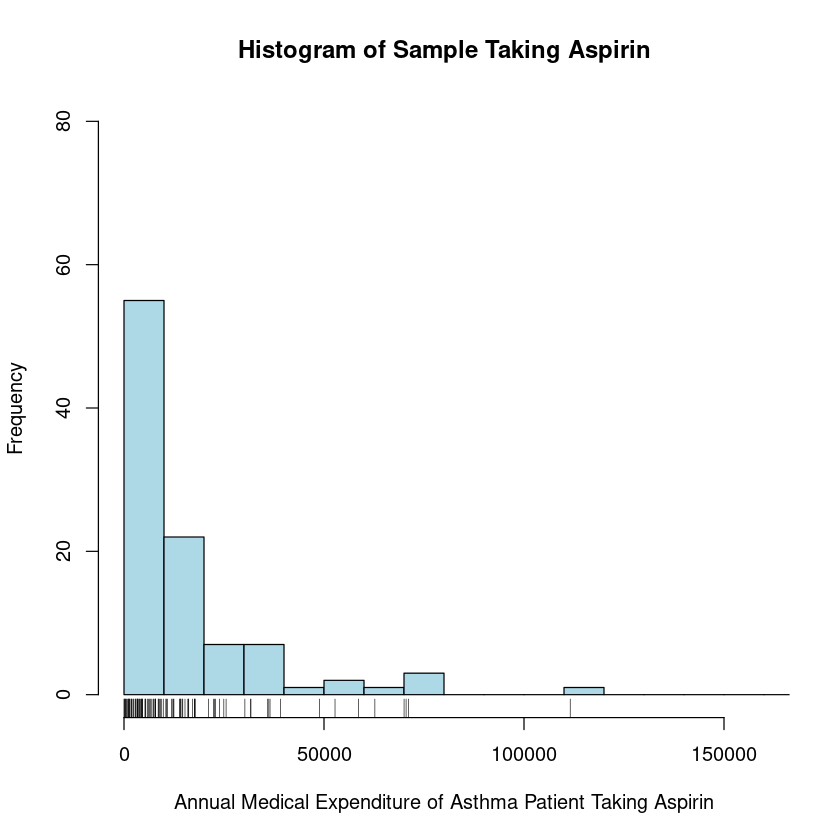

In [39]:
# Create histogram of aspirin taking group
hist(sample_taking_aspirin$TOTEXP09, col = 'lightblue', xlab = "Annual Medical Expenditure of Asthma Patient Taking Aspirin", 
     main = "Histogram of Sample Taking Aspirin", xlim = c(0,160000), ylim = c(0,80), breaks = 15)
rug(jitter(sample_taking_aspirin$TOTEXP09))

Below is the histogram for the non-aspirin-taking sample. 

In [ ]:
# Create histogram of not taking aspirin group
hist(sample_not_taking_aspirin$TOTEXP09, col = 'lightblue', xlab = "Annual Medical Expenditure of Asthma Patient Not Taking Aspirin",
    main = "Histogram of Sample Not Taking Aspirin", xlim = c(0,160000), ylim=c(0,80), breaks = 15)
rug(jitter(sample_not_taking_aspirin$TOTEXP09))

Our histogram shows a stark difference in distribution between the two samples. We can see that the distribution of the group that takes aspirin skews right towards higher annual expenditures.

## Visualizing Aspirin Costs With A Boxplot

We can also visually compare the difference in the shapes of the distribution using a box plot. Additional information about interpreting a boxplot can be found in section 4.5.1.

In [ ]:
# Setting up the plot
boxplot(TOTEXP09 ~ ASPRIN53, names=c("Taking Aspirin", "Not Taking Aspirin"),
        main = "Boxplot of Sample Taking Aspirin vs. Sample Not Taking Aspirin", 
        xlab = "Aspirin Usage Status", ylab = 'Annual Medical Expenditure', col = 'lightblue')

The main box is very difficult to see due to the large number of points along the tail of each plot. Lets visualize the graph without these tail points to compare the two boxes. 

In [ ]:
# Plotting the boxplot
boxplot(TOTEXP09 ~ ASPRIN53, names = c("Taking Aspirin", "Not Taking Aspirin"),
        main = "Boxplot of Sample Taking Aspirin vs. Sample Not Taking Aspirin", 
        xlab = "Aspirin Usage Status", ylab = 'Annual Medical Expenditure', col = 'lightblue', outline = FALSE)

You've just seen how using a combination of clinical knowledge, descriptive analysis, and data visualization can help us identify features for our prediction model. In our next section we will be arriving at the main event, building our prediction model!

### How To Interpret A Boxplot

The boxplot divides data into division known as quartiles. The first quartile (Q1) corresponds to the 25th percentile of the data. The second quartile (Q2) corresponds to the 50th percentile of the data. This is also the median. The third quartile (Q3) corresponds to the 75 percentile of the data. The lines on the box represent Q1, the median, and Q3. The tails or 'whiskers' of the plots represent 1.5 * IQR above and below the Q1 and Q3. 

<img src="https://miro.medium.com/max/1200/1*2c21SkzJMf3frPXPAR_gZA.png" align="center" style="width: 70%; margin-bottom: 0.5em; margin-top: 0.5em;">

In this exercise, we've seen how descriptive analysis can aid us in identifying useful variables for building a prediction model. An important takeaway from this exercise is seeing how clinical knowledge can inform our data analysis. In our case, having an understanding of the pathophysiology of aspirin and asthma allowed us to identify a variable that can lead to higher expenditure from among more than 2000 variables. 

# Building A Predictive Model

We now arrive at building our prediction model. We will be employing logistic regression to conduct a statistical analysis followed by employing machine learning to construct a prediction model. At the end, our goal is to have a product that can identify high-risk/high-cost asthma patients!

## Reading In Our Data

Once again, we read in our data to being our analysis. We will be using our created file from Section 3: 'Cleaning our Data'erc

In [ ]:
# Reading our data
cat('Data loading, please wait\n')
aggregation <- read.csv(file="aggregation.csv",  encoding="UTF-8", header=TRUE, sep=",")
cat('Data loaded!')

Now lets confirm our data has been loaded correctly

In [ ]:
# Display the first few rows of the data
cat("Displaying the the first few rows of the data:\n")
head(aggregation)

## Converting Variables Into Categorical Variables

**Pre-Check:** What is the difference between a quantitative and categorical variable?

>- **Quantitative:** variables whose values are whole numbers (ie. numbers, percents)
>- **Categorical:** variables whose values are selected from a group (ie. dog breeds, male/female) 

Several of our variables are categorical variables but are mistakenly classified in R as quantitative. This is due their data label being numbers (ie. for `ASPRIN53` 1 = taking aspirin & 2 = not taking aspirin). The code below will convert these variable to categorical. 

In [ ]:
# Converting variables to categorical variable type
aggregation$REGION09 <- as.factor(aggregation$REGION09)
aggregation$SEX <- as.factor(aggregation$SEX)
aggregation$RACETHNX <- as.factor(aggregation$RACETHNX)
aggregation$SPOUIN09 <- as.factor(aggregation$SPOUIN09)
aggregation$RTHLTH53 <- as.factor(aggregation$RTHLTH53)
aggregation$EMPHDX <- as.factor(aggregation$EMPHDX)
aggregation$CHBRON53 <- as.factor(aggregation$CHBRON53)
aggregation$ASTHDX <- as.factor(aggregation$ASTHDX)
aggregation$ASACUT53 <- as.factor(aggregation$ASACUT53)
aggregation$ASMRCN53 <- as.factor(aggregation$ASMRCN53)
aggregation$ASPREV53 <- as.factor(aggregation$ASPREV53)
aggregation$ASPKFL53 <- as.factor(aggregation$ASPKFL53)
aggregation$ASWNFL53 <- as.factor(aggregation$ASWNFL53)
aggregation$WLKLIM53 <- as.factor(aggregation$WLKLIM53)
aggregation$WLKDIF53 <- as.factor(aggregation$WLKDIF53)
aggregation$UNABLE53 <- as.factor(aggregation$UNABLE53)
aggregation$BLIND42 <- as.factor(aggregation$BLIND42)
aggregation$PHYSCL42 <- as.factor(aggregation$PHYSCL42)
aggregation$EXRCIS53 <- as.factor(aggregation$EXRCIS53)
aggregation$ASPRIN53 <- as.factor(aggregation$ASPRIN53)
aggregation$ADEGMC42 <- as.factor(aggregation$ADEGMC42)
aggregation$ADEXPL42 <- as.factor(aggregation$ADEXPL42)
aggregation$ADPRTM42 <- as.factor(aggregation$ADPRTM42)
aggregation$ADSMOK42 <- as.factor(aggregation$ADSMOK42)
aggregation$ADNSMK42 <- as.factor(aggregation$ADNSMK42)
aggregation$DSFL0953 <- as.factor(aggregation$DSFL0953)
aggregation$DSFL0853 <- as.factor(aggregation$DSFL0853)
aggregation$DSFLNV53 <- as.factor(aggregation$DSFLNV53)
aggregation$PMUNAB42 <- as.factor(aggregation$PMUNAB42)
aggregation$PMUNRS42 <- as.factor(aggregation$PMUNRS42)
aggregation$PMUNPR42 <- as.factor(aggregation$PMUNPR42)
aggregation$PMDLAY42 <- as.factor(aggregation$PMDLAY42)
aggregation$OCCCAT53 <- as.factor(aggregation$OCCCAT53)
aggregation$UNINS09 <- as.factor(aggregation$UNINS09)
aggregation$INSCOV09 <- as.factor(aggregation$INSCOV09)
aggregation$INS09X <- as.factor(aggregation$INS09X)

### Why Is Classifying Variables Correctly Important?

Having a classifying variables as the correct data type is critical because certain statistical and analytical measurements can only be used for specific data types. For instance, we can graph quantitative data using a histogram but not categorical data. On the other hand, logistic regression can measure the outcome of a type of categorical variable known as a binary variable (ie. yes/no, high-risk/low-risk) but is unable to measure the outcome of quantitative variables. 

## Defining High- and Low- Risk Patients

Next, we need to define what a low-risk or high-risk patient is so we can evaluate train and evaluate the performance of our prediction model. 

We will begin descriptively examining our data

In [ ]:
# Summary statistics for annual healthcare expenditure
summary (aggregation$TOTEXP09)

# Histogram of annual healthcare expenditure
hist(aggregation$TOTEXP09, col = 'lightblue', xlab = "Annual Medical Expenditure", 
     main = "Histogram of Annual Medical Expenditure", breaks = 20)

From our analysis, we can see the that the distribution for annual medical expenditure is not a normal distribution. 

**Knowledge Check:** Based our distribution, should we use mean or median?

A non-normal distribution indicates that median would be a better measure of central tendency. 

The median provides us a useful measure for defining high- and low- risk. Since individuals above the median annual expenditure represent the largest 1/2 of expenditure values, we can classify these individuals as high-risk. Since individuals below the median annual expenditure represent the smalled 1/2 of expenditure values, we can classify these individuals as low-risk. In summary

> **High-risk** patients are defined as those with annual medical expenditures **>= 2122**
> **Low-risk** patients are defined as those with annual medical expenditures **<= 2122**

The below code will convert our expenditure into the binary risk categories we just defined

<img align="left" width="100" height="100" src="https://cdn-01.media-brady.com/store/stus/media/catalog/product/cache/4/image/85e4522595efc69f496374d01ef2bf13/1544627174/r/e/reflective-warning-signs-caution-ac0563-lg.jpg" style="padding-right: 10px">If you run the below code more than once, please restart the exercise. Running it more than once will cause errors in our later prediction model. Do not run the code cell again after you see the 'Labeling complete' text!


In [ ]:
# Labeling indviduals as high or low risk
aggregation$TOTEXP09 <- ifelse(aggregation$TOTEXP09 >= 2122, "high_risk", "low_risk")
cat('Labeling complete!')

Lets see the first 5 observations of our newly labeled variable to confirm our labeling was successful

In [ ]:
# Displaying first few rows of health expenditure variable to confirm labeling success
head(aggregation$TOTEXP09)

## Analyzing Our Data: Logistic Regression 

Now that our variables have been successfully converted and our outcome has been defined, we can analyze our data. Logistic regression is a mathematical model that estimates the probability of a binary outcomes (such as our risk label). It is named after the logistic curve which takes the S-shape depicted below.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/640px-Logistic-curve.svg.png?1566122052688" alt="Logistic Curve" title="Logistic Curve" />

**Pre-Check:** What is our primary outcome? What information will a logistic regression model tell use about our outcome?

It will allow us to analyze which variables have a statistically significant effect on whether an asthmatic individual is high- or low-risk. Logistic regression is a commonly used technique in health analytics because it is easy to interpret and is thought to model the multi-factorial causes of disease well. 

**Follow-Up:** What is statistical significance? What is a generally accepted level of statistical significance in healthcare research?

Statistical Significance can be defined as the chance that the relationship you observed in your data occurred by chance. What does this mean? Lets say our logistic regression model finds that weight has a statistically significant effect on being high risk or low risk asthmatic patient. This means that it more likely that there is indeed a relationship between weight and risk than chance would suggest. 

The conventional level of significance that is accepted is < 0.05 (this number is referred to as a p-value). This means that there is less than 5% chance that the observed relationship in the data was due to chance alone. The image below display a sample R output.

<img src="https://drchrispook.files.wordpress.com/2017/02/anova-output-from-r1.jpg" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

By converting expenditure into 'high-risk' or 'low-risk', we've converted expenditure from a quantitative variable into a categorical variable. We now need to change the data type in R to reflect this. 

In [ ]:
# Expenditure is now a categorical variable. Below code is converting it to a categorical variable. 
aggregation$TOTEXP09 <- as.factor(aggregation$TOTEXP09)

We can now create our logistic model. 

In [ ]:
# Creating a logistic regression model
# Note: DUPERSID is a personal ID and CONDIDX is an independent variable. For these reasons, these variables were not
# included in the model
mylogit <- glm(TOTEXP09 ~ ., data = aggregation[,c(2:39,41:53)], family = "binomial")
mylogit.sum <- summary(mylogit)
mylogit.sum

The above model allows us to see what variables are considred to have a statically significant effect on risk for high healthcare expenditure. For instance, `AGE09X`(age) has a statistically significant effect with a p-value of 0.0000332. Interestingly, `ASPRIN53`(aspirin) was not considered a statistically significant variable (although the p-value is close to 0.05). This could be for a variety of factor such as a confounding variable present in our model. 

## Building a Prediction Model

**Pre-Check:** So far we haven't done any machine learning yet. What we've done can be considered traditional statistical analyses. What is Machine Learning?

In machine learning, data is split into a training and test set. A machine learning model is then trainined on the training set to predict whatever outcome of interest it was designed to predict (in our case we're predicting whether the asthmatic patient is high- or low- risk). The models predictive performance is then evaluated using the test set. 

<img src="https://www.sqlservercentral.com/wp-content/uploads/2019/05/Image-2.jpg" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

We now need to split our data into training and test data. We will be splitting our data into 80% training data and 20% test data. 

In [ ]:
## In the test set, there were attribute values that were not seen in the training set.
## So, we have to remove those instances.
adjusted <- subset(aggregation, PMUNAB42 != -8 )
adjusted <- subset(adjusted, WLKLIM53 != -7 )
adjusted <- subset(adjusted, PMUNPR42 != -8 & PMUNRS42 != 4 & PMUNRS42 != 8  )
adjusted <- subset(adjusted, OCCCAT53 != 6  )

# Setting seed value to reproduce results of random sampling
set.seed(129)

# row positions for training data
trainingRowIndex <- sample(1:nrow(adjusted), 0.8*nrow(adjusted))  

# Creating training data
trainingData <- adjusted[trainingRowIndex, ]  
cat('The number of traning data observations:', length(trainingData$TOTEXP09), '\n') # Checking the amount of training data

# Creating test data
testData  <- adjusted[-trainingRowIndex, ]  
cat('The number of test data observations:', length(testData$TOTEXP09)) # Checking the amount of test data

Now that we've created our training and test data, we need to build our machine learning model. 

In [ ]:
# Build the model on training data -
attach(trainingData)
modelFit <- train(TOTEXP09 ~ ., data = trainingData[,c(2:39,41:53)], method="glm")
mylogit <- glm(TOTEXP09 ~ ., data = trainingData[,c(2:39,41:53)], family = binomial())

detach(trainingData)
attach(testData)

cat('Model trained!')

Now that our model is trained we need to apply it to the test data

In [ ]:
# Apply the model to test data
modelPred <- predict(modelFit, newdata = testData[,c(2:39,41:53)])
modelPred.na <- predict(mylogit, newdata = testData[,c(2:39,41:53)], method = "glm", na.action = na.pass)
  
TOTEXP09.new <- TOTEXP09[complete.cases(modelPred.na)]

cat('Model successfully applied to test data!')

Finally we will generate what's called a confusion matrix. 

In [ ]:
# Create Confusion matrix
cm <- confusionMatrix(modelPred, TOTEXP09.new)
## Show confusion matrix
cm

Our model was able to correctly predict 73% of the time with a sensitivity of 76% and a specificity of 78%. The similar sensitivity and specificity indicate this model approximately equal in ruling out and ruling in whether a patient is high risk. 

One question you may be wondering is does our model perform well enough? That depends. That depends on the type of condition or prediction we're making. That depends on whether alternative predictive models or tools exist and how our new model compares. Additional research or consideration should always be done consider whether a model's result is not only statistically significant, but **clinically significant**. 

### What Is A Confusion Matrix

A confusion matrix is a 2x2 table which computes 4 different combinations of predicted vs. actual values. The combinations are True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)

<img src="https://miro.medium.com/max/320/1*Z54JgbS4DUwWSknhDCvNTQ.png" align="center" style="margin-bottom: 0.5em; margin-top: 0.5em;">

These 4 interpretations can be combined to generate many useful metrics. For our purpose there are three we will focus on. The first is accuracy: <a href="https://www.codecogs.com/eqnedit.php?latex=\large&space;(TP&space;&plus;&space;TN)/Total" target="_blank"><img src="https://latex.codecogs.com/gif.latex?\large&space;(TP&space;&plus;&space;TN)/Total" title="\large (TP + TN)/Total" style="margin-bottom: 0.5em; margin-top: 0.5em;"/></a>
Accuracy allows us to measure how often our model predicted correctly. The second metric is sensitivity:<a href="https://www.codecogs.com/eqnedit.php?latex=\large&space;TP&space;/&space;(TP&space;&plus;&space;FN)" target="_blank"><img src="https://latex.codecogs.com/gif.latex?\large&space;TP&space;/&space;(TP&space;&plus;&space;FN)" title="\large TP / (TP + FN)" style="margin-bottom: 0.5em; margin-top: 0.5em;"/></a>
Sensitivity asks the question, that when our outcome is actually positive (ie. in our case when our patient is actually high-risk) how often will the model predict positively (ie. how often will the model then predict the patient to be high-risk). The final metric is specificity:<a href="https://www.codecogs.com/eqnedit.php?latex=\large&space;FP&space;/&space;(FP&space;&plus;&space;TN)" target="_blank"><img src="https://latex.codecogs.com/gif.latex?\large&space;FP&space;/&space;(FP&space;&plus;&space;TN)" title="\large FP / (FP + TN)" style="margin-bottom: 0.5em; margin-top: 0.5em;"/></a>
Specificity asks the question, that when the outcome is actually negative (ie. in our case when our patient is actually low-risk) how often will the model predict negatively (ie. how often will the model then predict the patient to be low-risk). 




## Identifying Incorrect Observations

There are many ways we can improve our model. Analytics is an iterative process. We may need to reconsider the variables chosen to build our models. We can also the find the observations that were incorrectly predicted and analyze those observations. Regardless, there are numerous options for improving our model. The code below will identify observations that were incorrectly predicted. What you do with this information is up to you!

In [ ]:
# Identify which observations were incorrectly predicted
which(modelPred != TOTEXP09.new) 

Congratulations! You've reached the end of the case! This case provided just one example of how analytics and healthcare can be combined to solve clinical problems. I hope your curiosity has been piqued. There much more to learn and much more you can explore in this field!